# Basic about R Programming

This lecture note will cover some basics of R programming that we are going to use in the first few lectures.

The [R Foundation](https://www.r-project.org/about.html) states that "R is a language and environment for statistical computing and graphics."   Importantly, R is open-source, free software distributed under a GNU GPL-3 license.

It is also easily extensible through contributed packages that cover much of modern statistics and data science.

### Objects

Nearly everything in R is an object that can be referred to by name.



#### Assignment 

We generally create objects by assigning values to them.  Here are some examples:

In [2]:
x <- 1 
y = 1    
hello <- "hello world"
2 -> z # this work but bad style, avoid this
concat <- c(x,z) # form vectors by combining elements
the_answer = 111 # Most other programming languages use = for assignment

print(x)
print(y)
print(z)
print(hello)
print(concat)
the_answer

[1] 1
[1] 1
[1] 2
[1] "hello world"
[1] 1 2


[1] 111

#### Naming Objects 

Object names can be any syntactically [valid](https://stat.ethz.ch/R-manual/R-devel/library/base/html/make.names.html) name. You should, however, avoid clobbering built in R names such as `pi`, `mean`, `sum`, and etc.

There are certain words that have already been used by `R`.  You should avoid using [reserved words](https://stat.ethz.ch/R-manual/R-devel/library/base/html/Reserved.html) when naming objects.

You should generally use concise and meaningful, descriptive names for objects you create. There are various styles for creating object names with multiple words:

- snake_case : separate words with an underscore
- camelCase : capitalize subsequent words
- dot.case : separate words with a period

Following the tidyverse style guide, you should use snake_case in code you write for this course. Avoid dot.case and camelCase.

In [3]:
# trying out some examples
#.2way  # this is an unexpected symbol, . cannot follow by number, invalid object name
#.twoway # this is a valid object name, it says that the object .twoway is not found

In [4]:
# Some examples of R built in names that we do not want to overwrite
pi 
mean
sum

[1] 3.141593

function (x, ...) 
UseMethod("mean")
<bytecode: 0x7fbf5d6b4d38>
<environment: namespace:base>

function (..., na.rm = FALSE)  .Primitive("sum")

#### Non-Syntactic Names

In a lot of datasets that people have collected and recorded in a data.frame (which we will learn later), you will often see non-syntactic names, i.e., names that break the rules above.  This is usually due to presentation purposes, for instance, for plotting.  Non-syntactic names can be created using back-ticks (i.e. `object name`):

In [5]:
`.2way` = 100
`.2way`

# Suppose that this is a name of a column in a data.frame.  When we learn plotting in R, we will see that 
# the variable name Value ($) will be directly plotted in the graph.
`Value ($)` = 1000
`Value ($)`

[1] 100

[1] 1000

#### Style-Guide in This Class

Generally speaking, you do not need to adopt all aspects of my coding style. However, you should develop and use a consistent style of your own.

Still, I will ask you to follow certain common but non-universal style conventions in order to create a cohesive course style. Here are the first few:
 
- Please use `snake_case` when [naming objects](https://www.r-bloggers.com/consistent-naming-conventions-in-r/).
- Do not use CAPITAL letters in object names.
- Always include a space after a comma.
- Use = or <- for assignment universally - do not mix and match.

## Global Environment

An environment is a context in which the names we use to refer to R objects have meaning. For now, it is sufficient to know that the default environment where objects are assigned is called the global environment. You can list objects in the global environment using the function `ls()` and can remove objects using `rm()` or `remove()`. 

Later on we will work with functions, and object name within two different functions may take on different meaning.  For now let us focus on the global environment. 

In [8]:
print(ls())

[1] "concat"     "hello"      "the_answer" "Value ($)"  "x"         
[6] "y"          "z"         


In [9]:
remove(the_answer)
print(ls())

[1] "concat"    "hello"     "Value ($)" "x"         "y"         "z"        


In [10]:
remove(x,y)
print(ls())

[1] "concat"    "hello"     "Value ($)" "z"        


To remove all objects from the global environment, we can use the function `rm(list=ls())`

In [11]:
rm(list=ls())
print(ls())

character(0)


Essentially, what the above function does is that the function `ls()` will create a vector of object names that are currently in the global environment, and `list=ls()` means to pass the object names to a list as strings.  The `remove` or `rm` function will then take the input as strings.   

## Arithmetic operations

R can do arithmetic with objects that contain numeric types.



In [12]:
x = 10
y = 32
z = x + y 
x + y

[1] 42

In [13]:
z / x


[1] 4.2

In [14]:
z^2


[1] 1764

In [15]:
z + 2 * c(y, x) - 10  


[1] 96 52

We will talk about vector in the next class.  But what happen here?  Essentially `z` is a scalar, and `c(y,x)` is a vector.  You are adding a scalar with a vector, which may seem strange.  This is because `R` recycle values that are in the shorter vector and use it again to perform the arithmetic operation. 

Often times, we need to be careful about mixing vectors of different lengths as R will generally recycle values:



In [16]:
x = 4:6 # create integer 4, 5, and 6
y = c(0, 1)
x * y

Warning message in x * y:
“longer object length is not a multiple of shorter object length”


[1] 0 5 0

Here, basically R multiply the first element of x with the first element of y, 2nd element of x with the 2nd element of y.  Since the vectors are of different lengths, R will multiply the 3rd element of x and with the first element of y (reuse element of y), and etc.  

In [17]:
x = 1:4
y * x

[1] 0 2 0 4

We get same recycling behavior, but now y is a multiple of x, and R does not return a warning message

In [18]:
11 %% 2   # Modular arithmetic (i.e. what is the remainder)


[1] 1

In [19]:
11 %/% 2  # Integer division discards the remainder 


[1] 5

R has built-in functions for commonly used mathematical functions:

In [20]:
mean(x) # average
sum(x)  # summation
sd(x)   # Standard deviation
var(x)  # Variance
exp(x)  # Exponential
sqrt(x) # Square root
log(x)  # Natural log
sin(x)  # Trigonometric functions
cos(pi / 2) # R even contains pi, but only does finite arithmetic
floor(x / 2) #The nearest integer below
ceiling(x / 2) #The nearest integer above

[1] 2.5

[1] 10

[1] 1.290994

[1] 1.666667

[1]  2.718282  7.389056 20.085537 54.598150

[1] 1.000000 1.414214 1.732051 2.000000

[1] 0.0000000 0.6931472 1.0986123 1.3862944

[1]  0.8414710  0.9092974  0.1411200 -0.7568025

[1] 6.123234e-17

[1] 0 1 1 2

[1] 1 1 2 2

In [21]:
# Base functions in R
mean(x) # average
intersect(x,y)
union(x,y)
unique(c(x,y))

print(mean)
print(search()) # packages that get started with R without loading any other packages


[1] 2.5

[1] 1

[1] 1 2 3 4 0

[1] 1 2 3 4 0

function (x, ...) 
UseMethod("mean")
<bytecode: 0x7fbf5d6b4d38>
<environment: namespace:base>
 [1] ".GlobalEnv"        "jupyter:irkernel"  "package:stats"    
 [4] "package:graphics"  "package:grDevices" "package:utils"    
 [7] "package:datasets"  "package:methods"   "Autoloads"        
[10] "package:base"     


In [22]:
# Stat functions
sd(x) # standard deviation
var(x) # variance

print(sd)

[1] 1.290994

[1] 1.666667

function (x, na.rm = FALSE) 
sqrt(var(if (is.vector(x) || is.factor(x)) x else as.double(x), 
    na.rm = na.rm))
<bytecode: 0x7fbf2e6553a0>
<environment: namespace:stats>


When doing math in R or another computing language, be cognizant of the fact that numeric doubles have finite precision.
This can sometimes lead to unexpected results as seen here:

In [23]:
sqrt(2)^2 - 2

typeof(2)


[1] 4.440892e-16

[1] "double"

In [24]:
# floating point addition not commutative (that is, 1+2 is not equal to 2+1)
{.1 + .7 + .2} == 1

[1] TRUE

In [25]:
{.7 + .2 + .1} == 1


[1] FALSE

### Coding style when performing arithmetic 
Always include a space on either side of binary operators, e.g. `a + b` not `a+b` with the exception of high precedence operators. e.g. `a + b^2`, `1:3 + 2`.

## R package system

Much of the utility of R is derived from an extensive collection of user and domain-expert contributed packages. Packages are simply a standardized way for people to share documented code and data. There are thousands of packages, likely [more than 10,000](http://blog.revolutionanalytics.com/2017/01/cran-10000.html) officially distributed through the CRAN alone!

Packages are primarily distributed through three sources:

- [CRAN](https://cran.r-project.org/) # Comprehensive R Archieve Network
- [Github](http://r-pkgs.had.co.nz/git.html)
- [Bioconductor](https://www.bioconductor.org/)


#### Installing R Packages

The primary way to install a package is using `install.packages("package_name")`.



In [34]:
#install.packages("lme4") # the package name should be passed as a character string

In [35]:
# installing from github
#install.packages("devtools")
#devtools::install_github("tidyverse/dplyr")

#### Using packages in R

Installing a package does not make it available to R. There are two ways to use things from a package:

- calling `library("pkg")` to add it to the search path,
- using the `pkg::obj` construction to access a package’s exported objects,
- using the `pkg:::obj` to access non-exported objects.

These methods are illustrated below using the data set InstEval distributed with the `‘lme4’` package.

Note that we can also use require rather than library. But require does not return error/warning message of the library, so usually it is used inside a function.  It is important to get a warning/error message immediately when it occurs, so that we know where exactly our code fails to run.

In [39]:
print(search())

 [1] ".GlobalEnv"        "jupyter:irkernel"  "package:stats"    
 [4] "package:graphics"  "package:grDevices" "package:utils"    
 [7] "package:datasets"  "package:methods"   "Autoloads"        
[10] "package:base"     


In [1]:
library(lme4)
print(search())

Loading required package: Matrix



 [1] ".GlobalEnv"        "package:lme4"      "package:Matrix"   
 [4] "jupyter:irkernel"  "package:stats"     "package:graphics" 
 [7] "package:grDevices" "package:utils"     "package:datasets" 
[10] "package:methods"   "Autoloads"         "package:base"     


## Input and output

`R` is primarily and in-memory language, meaning it is designed to work with objects stored in wokring memory (i.e., RAM) rather than on your hard drive.  Therefore, it is important to know how to read and write data to and from your hard drive. 

#### Delimited Data

Data is commonly shared as text files (or maybe compressed files), often delimited by commas (e.g., `.csv`), tabs or `\t` (e.g., `.tab`, `.txt`), or one+ white space characters (e.g., `.data`, `.txt`).  



In the base `R` packages, these can be read using `read.table` and its wrappers like `read.csv`.  To read the file at `../data/hotel_bookings.csv`, use `read.table()` and assign the input to an object.

In [2]:
getwd()

[1] "/Users/keanmingtan/Dropbox/Teaching/Umich2019/Fall2021/STATS306/Lecture/Lecture1_km/try"

In [3]:
hotel_data = read.table("hotel_bookings.csv", sep = ",", 
                       stringsAsFactors = FALSE, header = TRUE)
head(hotel_data)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


The `read.table` function returns `data.frames`, which are special lists whose members all have the same length (i.e., the number of rows).  

To write delimited files into a csv file or txt file, you can also use the function `write.table` or `write.csv`.

### tidyverse (readR)
The `readR` package distributed with the `tidyverse` offers a more efficient version of the above with (arguably) better defaults.



In [4]:
hotel_data = readr::read_delim("hotel_bookings.csv", delim = ",")
print(class(hotel_data))

Rows: 119390 Columns: 32

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (13): hotel, arrival_date_month, meal, country, market_segment, distrib...
dbl  (18): is_canceled, lead_time, arrival_date_year, arrival_date_week_numb...
date  (1): reservation_status_date


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame" 


#### Native R Binaries

There are two common formats for writing binaries containing native `R` objects: `.Rdata` and `.rds`.  

To save one or more `R` objects to a file, use `save()`.

In [5]:
save(hotel_data,file = "hoteldata.RData")

In [7]:
rm(list = ls())
ls()
load("hoteldata.RData")
print(ls())

character(0)

[1] "hotel_data"


#### Case Study Example

To load a data frame from a file we use the `load()` function. In the same folder as this lecture there is a file called `flint.RData`. 

In [9]:
load('flint.RData')

This has loaded a data frame called `flint` containing data from the Flint water crisis:

In [10]:
summary(flint)

 Sample Number      Date Submitted                Analysis (Lead)   
 Length:23184       Min.   :2015-09-03 11:05:45   Length:23184      
 Class :character   1st Qu.:2016-02-01 13:27:43   Class :character  
 Mode  :character   Median :2016-02-18 13:07:39   Mode  :character  
                    Mean   :2016-02-29 14:05:42                     
                    3rd Qu.:2016-03-24 13:34:40                     
                    Max.   :2016-06-30 12:40:08                     
                    NA's   :13                                      
   Lead (ppb)       Analysis (Copper)   Copper (ppb)       Street #        
 Min.   :    0.00   Length:23184       Min.   :    0.0   Length:23184      
 1st Qu.:    0.00   Class :character   1st Qu.:    0.0   Class :character  
 Median :    1.00   Mode  :character   Median :    0.0   Mode  :character  
 Mean   :   17.09                      Mean   :   98.7                     
 3rd Qu.:    3.00                      3rd Qu.:  100.0              

Let's do some basic analysis of the Flint water crisis using this data. 

What are some questions we could ask about this data set?

In [11]:
sd(flint$`Lead (ppb)`, na.rm = TRUE)

[1] 281.3678

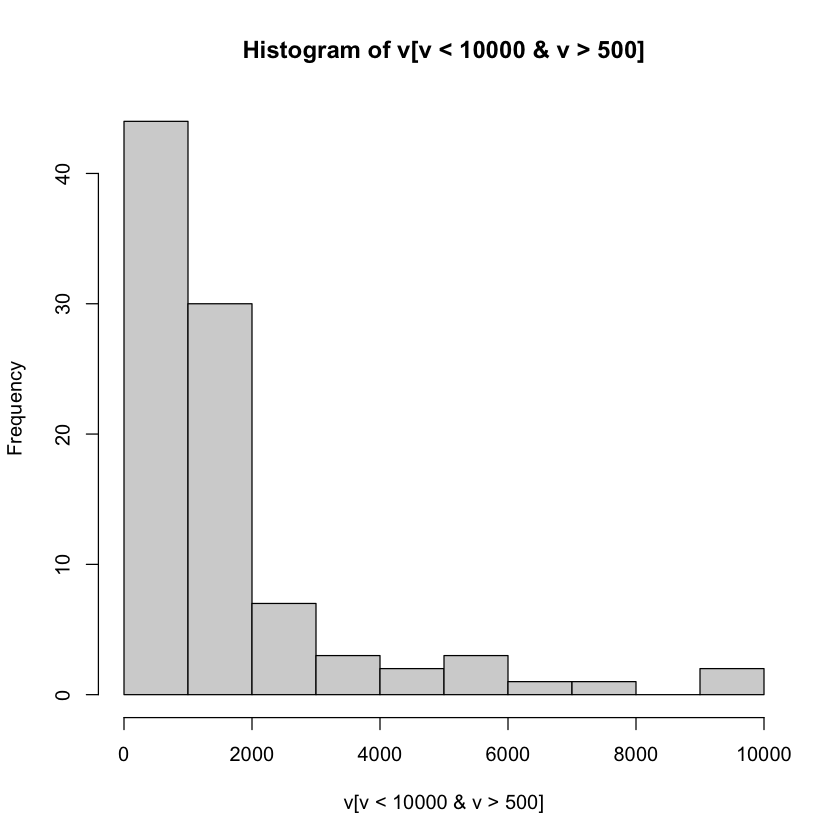

In [12]:
v <- flint$`Lead (ppb)`
hist(v[v < 10000 & v > 500])

In [13]:
table(flint$`Zip Code`)


       ***      45503      45804      48050      48053      48054      48057 
       112          2          1          1          2          1          1 
     48132      48205      48304      48386      48403      48406      48420 
         1          1          2          1          1          1          2 
     48423      48430      48432      48433      48439      48457      48458 
         3          1          1         10          9          2         25 
     48463      48473      48501      48502      48503 48503-1042 48503-2640 
         1          1          7        214       6882          1          1 
48503-2719 48503-2812 48503-3535 48503-4524 48503-4601 48503-5314      48504 
         1          1          1          1          1          1       4053 
48504-1644 48504-2164 48504-2844 48504-4842  48504-706 48504-7139      48505 
         1          1          1          1          1          1       3257 
48505-1934 48505-2551 48505-2564 48505-3327 48505-5164      485

In [14]:
z <- flint$`Zip Code`
mean(v[z == "48529"], na.rm=T)

[1] 8.327731

## Vectors

There are two kinds of vectors: atomic vectors and lists. Every vector has two defining properties aside from the values it holds:

- A type (or mode) referring to what type of data it holds, and
- A length referring to the number of elements it points to.

Use `typeof()` to determine a vector’s type and `length()` to determine its length.

In R, scalars are just vectors with length one.

### Atomic Vectors

The elements in atomic vectors must all be of the same type.
Here are the most important types:

- Logical: TRUE, FALSE
- Integer: 1L
- Double: 2.4
- Character: "some words"

Two less commonly used types are raw and complex. The mode of a vector of integers or doubles is numeric, the mode of other types is the same as the type.

In [16]:
# We mention that there are four diffent types
w = TRUE
x = 1L
y = 1
z = "One"

In [18]:
typeof(w)
typeof(x)
typeof(y)
typeof(z)


[1] "logical"

[1] "integer"

[1] "double"

[1] "character"